<h2 align="center">PERCEPTRON MULTICAPA
<h3 align="center">Determinar el precio de eviviendas en Boston

# Contexto

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's

In [25]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)
#test_split=0.2 indica que el 20% de dataset sera usado como test.

In [26]:
print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:",x_test.shape)

Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [27]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

---
# Arquitectura propuesta
---
Se propone una arquitectura con: 

* 13 neuronas de entrada.
* 1 capa oculta de 6 neuronas.
* 1 capa oculta de 4 neuronas.
* una salida de 1 neurona. 

Se generan dos capas opcultas con el proposito de extraer ciertas complejidades en los datos.

In [28]:
import numpy as np
from keras.models import Sequential        #permite construir capa a capa la red a implementar.
from keras.layers import Dense, Activation #Capa densa donde todas las neuronas se conectan con todas las demás.

In [29]:
#Definición de la arquitectura

model = Sequential()    #Generando insancia para el modelo.

#Agregando capas
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])   #loss:funcion de perdida.  

In [30]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
#!pip uninstall graphviz

#!pip install pydotplus
#!winget install graphviz

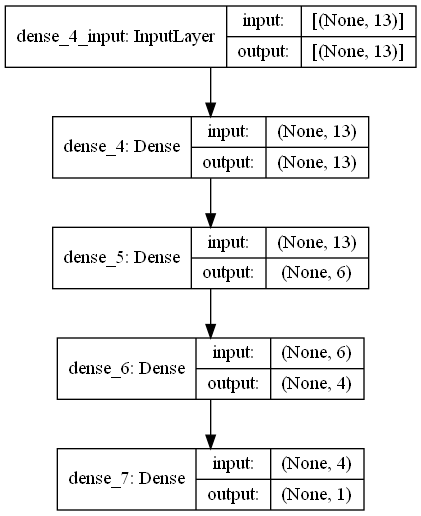

In [32]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

---

# Entrenamiento y Evaluación del modelo


Hasta ahora tenemos dividido el dataset en entrenamiento y prueba, pero tenemos que hacer una division adicional para validación. En consecuencia, se realizaran diferentes entrenamientos de la red neuronal diseñada y evaluaremos su desempeño.

In [33]:
#Entrena el modelo
x_val = x_train[300:,]   #variables                  #se tomaran los 300 valores iniciales
y_val = y_train[300:,]   #etiquetas


In [34]:
#Entrena el modelo
model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_val,y_val))

# batch_size=32 es el tamaño de los grupitos que se le va a proporcionar a la red para que se entrene. Claramente entre más grande el lote
#mas tiempo demora la red en entrenar

#epochs=5: Es la cantidad de iteraciones que el algoritmo realizará.

#validation_data: Conjunto de datos de validacion.

Epoch 1/5
13/13 [==============================] - 1s 33ms/step - loss: 563.5202 - mean_absolute_percentage_error: 99.9825 - val_loss: 536.4517 - val_mean_absolute_percentage_error: 99.8968
Epoch 2/5
13/13 [==============================] - 0s 9ms/step - loss: 590.1304 - mean_absolute_percentage_error: 99.8598 - val_loss: 534.7867 - val_mean_absolute_percentage_error: 99.6643
Epoch 3/5
13/13 [==============================] - 0s 10ms/step - loss: 564.9636 - mean_absolute_percentage_error: 99.5460 - val_loss: 529.8477 - val_mean_absolute_percentage_error: 98.9601
Epoch 4/5
13/13 [==============================] - 0s 12ms/step - loss: 558.2144 - mean_absolute_percentage_error: 98.6318 - val_loss: 515.9318 - val_mean_absolute_percentage_error: 96.9511
Epoch 5/5
13/13 [==============================] - 0s 12ms/step - loss: 569.6490 - mean_absolute_percentage_error: 96.2505 - val_loss: 482.5735 - val_mean_absolute_percentage_error: 91.9922


Los datos arrojados anteriormente son para cada iteración, por ejemplo en la primera iteración **loss:** función de pérdida, el **mean_absolute_percentage_error:** error absoluto (se espera que sea pequeño) pero en este caso es muy grande, ademas se muestran los resultados para la variables de validación   **val_loss:** y **val_mean_absolute_percentage**

Se puede observar unos resultados un poco desepcionantes puesto que la métrica del error absoluto porcentual fue del 99%, por lo tanto la arquitectura o la forma de entrenamiento del modelo no es la más optima.

Veamos una nueva configuración, modificando el número de epocs.

In [35]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 3ms/step - loss: 536.9194 - mean_absolute_percentage_error: 92.7786
loss  :  536.91943359375
mean_absolute_percentage_error  :  92.77855682373047


In [36]:
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
13/13 [==============================] - 0s 14ms/step - loss: 504.8171 - mean_absolute_percentage_error: 88.2686 - val_loss: 416.0835 - val_mean_absolute_percentage_error: 81.3703
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 414.7218 - mean_absolute_percentage_error: 74.9490 - val_loss: 309.8126 - val_mean_absolute_percentage_error: 64.2303
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 288.9604 - mean_absolute_percentage_error: 57.2525 - val_loss: 190.0411 - val_mean_absolute_percentage_error: 46.9156
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 172.0967 - mean_absolute_percentage_error: 45.3947 - val_loss: 130.3713 - val_mean_absolute_percentage_error: 47.0945
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 142.1554 - mean_absolute_percentage_error: 51.4098 - val_loss: 135.6385 - val_mean_absolute_percentage_error: 54.7659
Epoch 6/100
13/13 [=========================

Aquí puede observarse que en la epoca 100 el error pudo reducirse hasta llegar a un 21.3%, con lo cual se observa que al modificar un solo parámetro el desempeño de la red cambio radicalmente. 

* _En otras palabras con cada iteracion el algoritmo aprendio más sobre la información y pudo establecer los pesos_, produciendo el desempeño.

In [37]:
results = model.evaluate(x_test, y_test)                  # validemos ahora con el set de prueba.

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 3ms/step - loss: 46.6261 - mean_absolute_percentage_error: 20.6010
loss  :  46.62614822387695
mean_absolute_percentage_error  :  20.60100746154785


In [38]:
results

[46.62614822387695, 20.60100746154785]

* Con el set de información la metrica de desempeño fue de aproximadamente 18%, conociendo que en losdatos de prueba fue aproximado, se concluye que es aceptable el desempeño.

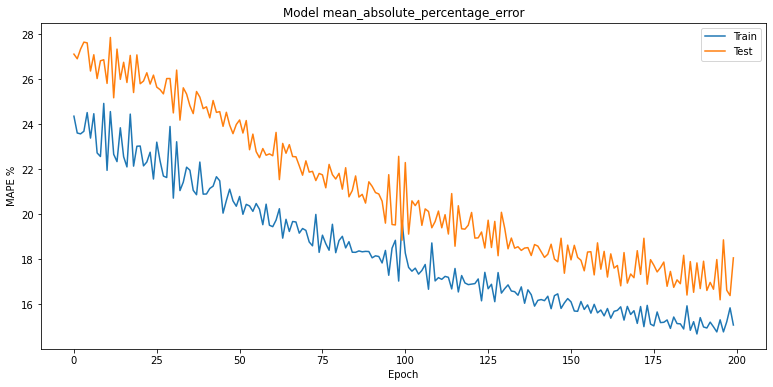

In [39]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val), verbose=0)   #verbose=0 para que no muestre el resultados


# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])   # history['mean_absolute_percentage_error'], trae el parámetro    mean_absolute_percentage_error
plt.plot(history.history['val_mean_absolute_percentage_error'])   #para incluir el mismo valor pero para el de validacion:      val_mean_absolute_percentage_error
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


En las gráfica se puede observar que:

* A medida que se hacen más iteraciones el error va disminuyendo tanto para el set de entrenamiento como el de validacion, esto implica que la red va aprendiendo de forma correcta.

* Después de la iteración 175 el error porcentual no disminuyo mucho, lo cual quiere decir que si se aumenta el número de iteraciones la mejora en el desempeño prácticamente sera marginal.


Anteriormente se observó como se comportaba la red con las métricas definidas, ahor miremos **¿cómo se comporta la red con la funcion de pérdida?**

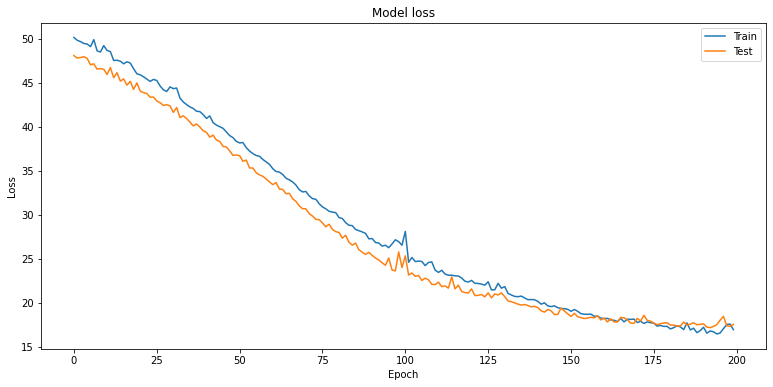

In [40]:

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

* simplemente la función de pérdida nos indicará en que dirección el algoritmo de entrenamiento tiene que enfocarse para aprender más sobre los datos.
* Según la gráfica a medida que se irteraba más, la red aprendia mucho más rápido y las pérdidas comenzaron a disminuir drásticamente, además las mejoras fueron siendo cada vez más pequeñas.
* No existe gran diferencia entre los sets de prueba y de validación.

Finalemnte, error obtenido cercano a 24%